In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
import numpy as np
import time

In [2]:
# Create a reference the CSV file desired

csv_path = "inpatientCharges.csv"

In [3]:
# Read the CSV into a Pandas DataFrame
DataFrame = pd.read_csv(csv_path)


In [4]:
# Display top 5 rows of dataframe for reference
DataFrame.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [99]:
# Display a statistical overview of the DataFrame for reference


DataFrame.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges,Average Covered Charges
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.954224,9707.473804,8494.490964,42.776304,36133.954224
std,151563.671767,27854.323080,51.104042,35065.365931,7664.642598,7309.467261,51.104042,35065.365931
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.900000,11.000000,2459.400000
25%,110092.000000,27261.000000,17.000000,15947.160000,5234.500000,4192.350000,17.000000,15947.160000
50%,250007.000000,44309.000000,27.000000,25245.820000,7214.100000,6158.460000,27.000000,25245.820000
75%,380075.000000,72901.000000,49.000000,43232.590000,11286.400000,10056.880000,49.000000,43232.590000
max,670077.000000,99835.000000,3383.000000,929118.900000,156158.180000,154620.810000,3383.000000,929118.900000


In [100]:
# Check to see if there are any incomplete rows
DataFrame.count()

DRG Definition                          163065
Provider Id                             163065
Provider Name                           163065
Provider Street Address                 163065
Provider City                           163065
Provider State                          163065
Provider Zip Code                       163065
Hospital Referral Region Description    163065
 Total Discharges                       163065
 Average Covered Charges                163065
 Average Total Payments                 163065
Average Medicare Payments               163065
Total Discharges                        163065
Average Covered Charges                 163065
dtype: int64

In [101]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_DRGs = len(DataFrame["DRG Definition"].unique())
Unique_DRGs

100

In [102]:
# Calculate the Number of Unique Providers: 
Unique_Provider_count = len(DataFrame["Provider Id"].unique())
Unique_Provider_count 

3337

In [103]:
# Calculate the Total Number of Unique States in the DataFrame
Unique_State_Count = len(DataFrame["Provider State"].unique())
Unique_State_Count

51

In [104]:
# Calculate the Total Number of Unique Provider Zip Codes in the DataFrame
Unique_Provider_ZipCode_Count = len(DataFrame["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count

3053

In [105]:
# Calculate the Unique Number of hospital_referral_region_description in the DataFrame
Unique_Hospital_Referral_Region_count = len(DataFrame["Hospital Referral Region Description"].unique())
Unique_Hospital_Referral_Region_count

306

In [106]:
# Observe the DataTypes of each column
DataFrame.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                         int64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
Total Discharges                          int64
Average Covered Charges                 float64
dtype: object

In [107]:
# # Use pd.to_numeric() method to convert the datatype of the Discharge Count column
DataFrame["Total Discharges"] = pd.to_numeric(DataFrame[" Total Discharges "])

# # Use pd.to_numeric() method to convert the datatype of the Average Covered Charges column
DataFrame["Average Covered Charges"] = pd.to_numeric(DataFrame[" Average Covered Charges "])

# # Use pd.to_numeric() method to convert the datatype of the Average Medicare Payments column
DataFrame['Average Medicare Payments'] = pd.to_numeric(DataFrame['Average Medicare Payments'])

# Use pd.to_numeric() method to convert the datatype of the Average Medicare Payments column
DataFrame['Average Medicare Payments'] = pd.to_numeric(DataFrame['Average Medicare Payments'])

# Use pd.to_numeric() method to convert the datatype of the Average Medicare Payments 2 column
#DataFrame['Average Medicare Payments 2'] = pd.to_numeric(DataFrame['Average Medicare Payments 2'])

In [108]:
# Observe the updated DataTypes of each column
DataFrame.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                         int64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
Total Discharges                          int64
Average Covered Charges                 float64
dtype: object

In [109]:
# Verify that the Discharge column datatype has been made numeric
DataFrame['Total Discharges'].dtype

# Observe the updated DataTypes of each column
DataFrame.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                         int64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
Total Discharges                          int64
Average Covered Charges                 float64
dtype: object

In [110]:
# Calculate the Total Number of Discharges in the DataFrame
Discharge_Count = (DataFrame["Total Discharges"].sum())
Discharge_Count

6975318

In [111]:
# Calculate the average covered charges amount
Average_Covered_Charges = DataFrame["Average Covered Charges"].mean()
Average_Covered_Charges

36133.95422439183

In [18]:
# Cacluate the max covered charge amount
Max_Covered_Charges = DataFrame["Average Covered Charges"].max()
Max_Covered_Charges

929118.9

In [112]:
# Cacluate the min covered charge amount
Min_Covered_Charges = DataFrame["Average Covered Charges"].min()
Min_Covered_Charges

2459.4

In [113]:
# Create a summary data frame to hold the Analysis Results

DRG_Analysis_df = pd.DataFrame([
    {"Unique DRGs": Unique_DRGs, 
     "Unique Providers": Unique_Provider_count, 
     "Unique Provider States": Unique_State_Count, 
     "Unique Provider Zip Codes": Unique_Provider_ZipCode_Count, 
     "Unique Regions": Unique_Hospital_Referral_Region_count,
     "Total Discharge Count": Discharge_Count,
     "Average Charge": Average_Covered_Charges,
     "Max Charge": Max_Covered_Charges,
     "Min Charge": Min_Covered_Charges
    }
])
DRG_Analysis_df

,Unique DRGs,Unique Providers,Unique Provider States,Unique Provider Zip Codes,Unique Regions,Total Discharge Count,Average Charge,Max Charge,Min Charge
0,100,3337,51,3053,306,6975318,36133.954224,929118.9,2459.4


In [114]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df = DRG_Analysis_df

DRG_Analysis_Formatted_df["Average Charge"] = DRG_Analysis_df["Average Charge"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df["Max Charge"] = DRG_Analysis_df["Max Charge"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df["Min Charge"] = DRG_Analysis_df["Min Charge"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df

,Unique DRGs,Unique Providers,Unique Provider States,Unique Provider Zip Codes,Unique Regions,Total Discharge Count,Average Charge,Max Charge,Min Charge
0,100,3337,51,3053,306,6975318,"$36,133.95","$929,118.90","$2,459.40"


In [115]:

# Filter the data so that only TN data is in the dataframe

DataFrame_TN = DataFrame.loc[DataFrame["Provider State"] == "TN", :]

DataFrame_TN.head(50)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges,Average Covered Charges
879,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,44,19872.77,6355.88,4957.81,44,19872.77
881,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,11,41660.09,6186.81,5266.45,11,41660.09
882,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440011,BLOUNT MEMORIAL HOSPITAL,907 E LAMAR ALEXANDER PARKWAY,MARYVILLE,TN,37804,TN - Knoxville,13,23726.38,5176.76,4318.30,13,23726.38
883,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440012,WELLMONT BRISTOL REGIONAL MEDICAL CENTER,ONE MEDICAL PARK BLVD,BRISTOL,TN,37620,TN - Kingsport,14,16276.78,5571.78,4603.78,14,16276.78
884,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440015,UNIVERSITY OF TN MEMORIAL HOSPITAL,1924 ALCOA HIGHWAY,KNOXVILLE,TN,37920,TN - Knoxville,41,19589.43,6720.24,5632.00,41,19589.43
885,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440017,WELLMONT HOLSTON VALLEY MEDICAL CENTER,130 WEST RAVINE ROAD,KINGSPORT,TN,37662,TN - Kingsport,28,20252.03,5809.64,4595.82,28,20252.03
886,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440029,WILLIAMSON MEDICAL CENTER,4321 CAROTHERS PARKWAY,FRANKLIN,TN,37067,TN - Nashville,23,20155.47,5723.65,4303.86,23,20155.47
887,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440030,MORRISTOWN HAMBLEN HOSPITAL ASSOCIATION,908 W 4TH NORTH ST,MORRISTOWN,TN,37814,TN - Knoxville,16,10904.81,5612.12,4629.62,16,10904.81
888,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440034,METHODIST MEDICAL CENTER OF OAK RIDGE,990 OAK RIDGE TURNPIKE BOX 529,OAK RIDGE,TN,37830,TN - Knoxville,40,12203.65,5220.60,4170.75,40,12203.65
889,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440035,GATEWAY MEDICAL CENTER,651 DUNLOP LANE,CLARKSVILLE,TN,37040,TN - Nashville,20,27194.25,6021.85,4833.30,20,27194.25


In [116]:
# Display a statistical overview of the TN DataFrame for reference

DataFrame_TN.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges,Average Covered Charges
count,4168.000000,4168.000000,4168.000000,4168.000000,4168.000000,4168.000000,4168.000000,4168.000000
mean,440088.813820,37707.079415,45.361084,29279.931835,8153.950854,6946.489304,45.361084,29279.931835
std,63.857754,463.599318,54.839946,25163.437067,5992.160893,5534.912633,54.839946,25163.437067
min,440001.000000,37030.000000,11.000000,4214.090000,2755.630000,1640.400000,11.000000,4214.090000
25%,440034.000000,37236.000000,17.000000,14249.665000,4575.795000,3549.842500,17.000000,14249.665000
50%,440072.000000,37743.000000,27.000000,21254.175000,6184.575000,5161.010000,27.000000,21254.175000
75%,440150.000000,38104.000000,53.000000,34338.282500,9512.325000,8383.762500,53.000000,34338.282500
max,440228.000000,38583.000000,808.000000,287322.900000,48753.130000,48065.520000,808.000000,287322.900000


In [117]:

# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_DRGs_TN = len(DataFrame_TN["DRG Definition"].unique())
Unique_DRGs_TN

100

In [118]:
# Calculate the Number of Unique Providers in TN: 
Unique_Provider_count_TN = len(DataFrame_TN["Provider Id"].unique())
Unique_Provider_count_TN

97

In [119]:
# Calculate the Unique Number of hospital_referral_region_description in TN 
Unique_Hospital_Referral_Region_count_TN = len(DataFrame_TN["Hospital Referral Region Description"].unique())
Unique_Hospital_Referral_Region_count_TN

8

In [120]:
# Calculate the Total Number of Discharges in TN 
Discharge_Count_TN = (DataFrame_TN["Total Discharges"].sum())
Discharge_Count_TN

189065

In [28]:

# Cacluate the average covered charges amount in TN
Average_Covered_Charges_TN = DataFrame_TN["Average Covered Charges"].mean()
Average_Covered_Charges_TN

29279.931835412586

In [29]:

# Cacluate the max covered charge amount in TN
Max_Covered_Charges_TN = DataFrame_TN["Average Covered Charges"].max()
Max_Covered_Charges_TN

287322.9

In [30]:

# Cacluate the min covered charge amount in TN
Min_Covered_Charges_TN = DataFrame_TN["Average Covered Charges"].min()
Min_Covered_Charges_TN

4214.09

In [31]:
# Calculate the Total Number of Unique Provider Zip Codes in TN 
Unique_Provider_ZipCode_Count_TN = len(DataFrame_TN["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count_TN

94

In [32]:
# Create a summary data frame to hold the Analysis Results

DRG_Analysis_df_TN = pd.DataFrame([
    {"Unique DRGs in TN": Unique_DRGs_TN, 
     "Unique Providers in TN": Unique_Provider_count_TN, 
     "Unique Provider Zip Codes in TN": Unique_Provider_ZipCode_Count_TN, 
     "Unique Regions in TN": Unique_Hospital_Referral_Region_count_TN,
     "Total Discharge Count in TN": Discharge_Count_TN,
     "Average Charge in TN": Average_Covered_Charges_TN,
     "Max Charge in TN": Max_Covered_Charges_TN,
     "Min Charge in TN": Min_Covered_Charges_TN
    }
])
DRG_Analysis_df_TN

,Unique DRGs in TN,Unique Providers in TN,Unique Provider Zip Codes in TN,Unique Regions in TN,Total Discharge Count in TN,Average Charge in TN,Max Charge in TN,Min Charge in TN
0,100,97,94,8,189065,29279.931835,287322.9,4214.09


In [33]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df_TN = DRG_Analysis_df_TN

DRG_Analysis_Formatted_df_TN["Average Charge in TN"] = DRG_Analysis_df_TN["Average Charge in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN["Max Charge in TN"] = DRG_Analysis_df_TN["Max Charge in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN["Min Charge in TN"] = DRG_Analysis_df_TN["Min Charge in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_TN

,Unique DRGs in TN,Unique Providers in TN,Unique Provider Zip Codes in TN,Unique Regions in TN,Total Discharge Count in TN,Average Charge in TN,Max Charge in TN,Min Charge in TN
0,100,97,94,8,189065,"$29,279.93","$287,322.90","$4,214.09"


In [34]:
# Filter the data so that only TN - Nashville data is in the dataframe

DataFrame_TN_Nashville = DataFrame.loc[DataFrame["Hospital Referral Region Description"] == "TN - Nashville", :]

DataFrame_TN_Nashville.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges,Average Covered Charges
401,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,180013,THE MEDICAL CENTER AT BOWLING GREEN,250 PARK STREET,BOWLING GREEN,KY,42101,TN - Nashville,65,18149.16,6416.32,5282.30,65,18149.16
408,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,180051,JENNIE STUART MEDICAL CENTER,320 WEST 18TH STREET,HOPKINSVILLE,KY,42240,TN - Nashville,14,15505.00,5833.35,4955.35,14,15505.00
881,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,11,41660.09,6186.81,5266.45,11,41660.09
886,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440029,WILLIAMSON MEDICAL CENTER,4321 CAROTHERS PARKWAY,FRANKLIN,TN,37067,TN - Nashville,23,20155.47,5723.65,4303.86,23,20155.47
889,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440035,GATEWAY MEDICAL CENTER,651 DUNLOP LANE,CLARKSVILLE,TN,37040,TN - Nashville,20,27194.25,6021.85,4833.30,20,27194.25


In [35]:
# Display a statistical overview of the TN - Nashville DataFrame for reference

DataFrame_TN_Nashville.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges,Average Covered Charges
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,408086.485942,38071.141114,39.967639,28663.494143,8222.511714,7026.193602,39.967639,28663.494143
std,85454.332559,1629.541402,43.051203,23299.385895,5917.640717,5520.435152,43.051203,23299.385895
min,180004.000000,37030.000000,11.000000,4501.000000,2986.570000,1640.400000,11.000000,4501.000000
25%,440029.000000,37129.000000,16.000000,14468.150000,4672.910000,3642.660000,16.000000,14468.150000
50%,440059.000000,37232.000000,26.000000,21670.530000,6309.610000,5248.000000,26.000000,21670.530000
75%,440144.000000,38501.000000,47.000000,33363.130000,9548.050000,8432.330000,47.000000,33363.130000
max,440227.000000,42345.000000,738.000000,201367.180000,48753.130000,48065.520000,738.000000,201367.180000


In [36]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs) in TN - Nashville
Unique_DRGs_TN_Nashville = len(DataFrame_TN_Nashville["DRG Definition"].unique())
Unique_DRGs_TN_Nashville

100

In [37]:

# Calculate the Number of Unique Providers in TN - Nashville
Unique_Provider_count_TN_Nashville = len(DataFrame_TN_Nashville["Provider Id"].unique())
Unique_Provider_count_TN_Nashville

42

In [38]:

# Calculate the Total Number of Discharges in TN - Nashville
Discharge_Count_TN_Nashville = (DataFrame_TN_Nashville["Total Discharges"].sum())
Discharge_Count_TN_Nashville

75339

In [39]:
# Cacluate the average covered charges amount in TN - Nashville
Average_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["Average Covered Charges"].mean()
Average_Covered_Charges_TN_Nashville

28663.494143236076

In [40]:
# Cacluate the max covered charge amount in TN - Nashville
Max_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["Average Covered Charges"].max()
Max_Covered_Charges_TN_Nashville

201367.18

In [41]:
Min_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["Average Covered Charges"].min()
Min_Covered_Charges_TN_Nashville

4501.0

In [42]:

# Calculate the Total Number of Unique Provider Zip Codes in TN - Nashville
Unique_Provider_ZipCode_Count_TN_Nashville = len(DataFrame_TN_Nashville["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count_TN_Nashville

41

In [43]:
# Create a summary data frame to hold the DRG Analysis Results for TN - Nashville

DRG_Analysis_df_TN_Nashville = pd.DataFrame([
    {"Unique DRGs in Nashville": Unique_DRGs_TN_Nashville, 
     "Unique Providers in Nashville": Unique_Provider_count_TN_Nashville, 
     "Unique Provider Zip Codes in Nashville": Unique_Provider_ZipCode_Count_TN_Nashville, 
     "Total Discharge Count in Nashville": Discharge_Count_TN_Nashville,
     "Average Charge in Nashville": Average_Covered_Charges_TN_Nashville,
     "Max Charge in Nashville": Max_Covered_Charges_TN_Nashville,
     "Min Charge in Nashville": Min_Covered_Charges_TN_Nashville
    }
])
DRG_Analysis_df_TN_Nashville

,Unique DRGs in Nashville,Unique Providers in Nashville,Unique Provider Zip Codes in Nashville,Total Discharge Count in Nashville,Average Charge in Nashville,Max Charge in Nashville,Min Charge in Nashville
0,100,42,41,75339,28663.494143,201367.18,4501.0


In [44]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df_TN_Nashville = DRG_Analysis_df_TN_Nashville

DRG_Analysis_Formatted_df_TN_Nashville["Average Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Average Charge in Nashville"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN_Nashville["Max Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Max Charge in Nashville"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN_Nashville["Min Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Min Charge in Nashville"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_TN_Nashville

,Unique DRGs in Nashville,Unique Providers in Nashville,Unique Provider Zip Codes in Nashville,Total Discharge Count in Nashville,Average Charge in Nashville,Max Charge in Nashville,Min Charge in Nashville
0,100,42,41,75339,"$28,663.49","$201,367.18","$4,501.00"


In [45]:

# Filter the data so that only a specific procedure is in the dataframe

DataFrame_drg_HEART_FAILURE = DataFrame.loc[DataFrame["DRG Definition"] == "291 - HEART FAILURE & SHOCK W MCC", :]

DataFrame_drg_HEART_FAILURE.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges,Average Covered Charges
41254,291 - HEART FAILURE & SHOCK W MCC,110028,UNIVERSITY HOSPITAL,1350 WALTON WAY,AUGUSTA,GA,30901,GA - Augusta,163,31462.46,9090.06,8390.92,163,31462.46
41281,291 - HEART FAILURE & SHOCK W MCC,110091,ROCKDALE MEDICAL CENTER,"1412 MILSTEAD AVENUE, NE",CONYERS,GA,30012,GA - Atlanta,89,24585.56,9543.67,8951.86,89,24585.56
41334,291 - HEART FAILURE & SHOCK W MCC,110092,DODGE COUNTY HOSPITAL,901 GRIFFIN AVE,EASTMAN,GA,31023,GA - Macon,25,16207.48,9052.08,8504.12,25,16207.48
41520,291 - HEART FAILURE & SHOCK W MCC,140007,PROVENA ST JOSEPH MEDICAL CENTER,333 N MADISON,JOLIET,IL,60435,IL - Joliet,259,43910.33,9063.49,8383.55,259,43910.33
41653,291 - HEART FAILURE & SHOCK W MCC,140080,RHC ST FRANCIS HOSPITAL,355 RIDGE AVE,EVANSTON,IL,60202,IL - Evanston,54,44448.51,12957.85,11001.01,54,44448.51


In [46]:
# Display a statistical overview of the HEART FAILURE PROCEDURES DataFrame for reference

DataFrame_drg_HEART_FAILURE.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges,Average Covered Charges
count,2687.000000,2687.000000,2687.000000,2687.000000,2687.000000,2687.000000,2687.000000,2687.000000
mean,257352.486044,49080.231113,69.072944,35901.904931,10266.545969,9403.954254,69.072944,35901.904931
std,154218.797546,27834.089305,59.648904,21278.837124,2747.538459,2697.928159,59.648904,21278.837124
min,10001.000000,1040.000000,11.000000,7303.810000,6738.800000,5768.050000,11.000000,7303.810000
25%,110123.000000,28220.000000,26.000000,21533.375000,8552.635000,7749.355000,26.000000,21533.375000
50%,250050.000000,45373.000000,51.000000,30177.640000,9393.040000,8538.690000,51.000000,30177.640000
75%,390042.500000,74104.000000,92.000000,43688.420000,11060.990000,10123.820000,92.000000,43688.420000
max,670068.000000,99701.000000,603.000000,173249.720000,34358.150000,32360.100000,603.000000,173249.720000


In [47]:
# Calculate the Number of Unique Providers that serviced DRG HEART_FAILURE PROCEDURES
Unique_Provider_count_drg_HEART_FAILURE = len(DataFrame_drg_HEART_FAILURE["Provider Id"].unique())
Unique_Provider_count_drg_HEART_FAILURE

2687

In [55]:
# Calculate the Unique Number of hospital_referral_region_description that serviced DRG HEART_FAILURE PROCEDURES in the DataFrame
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE = len(DataFrame_drg_HEART_FAILURE["Hospital Referral Region Description"].unique())
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE

306

In [56]:
# Calculate the Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES in the DataFrame
Discharge_Count_drg_HEART_FAILURE = (DataFrame_drg_HEART_FAILURE["Total Discharges"].sum())
Discharge_Count_drg_HEART_FAILURE

185599

In [57]:
# Cacluate the average covered charges for DRG HEART_FAILURE PROCEDURES
Average_Covered_Charges_drg_HEART_FAILURE = DataFrame_drg_HEART_FAILURE["Average Covered Charges"].mean()
Average_Covered_Charges_drg_HEART_FAILURE

35901.904931149955

In [58]:
# Cacluate the max covered charge amount for DRG HEART_FAILURE PROCEDURES

Max_Covered_Charges_drg_HEART_FAILURE = DataFrame_drg_HEART_FAILURE["Average Covered Charges"].max()
Max_Covered_Charges_drg_HEART_FAILURE

173249.72

In [60]:
# Cacluate the min covered charge amount for DRG HEART_FAILURE PROCEDURES

Min_Covered_Charges_drg_HEART_FAILURE = DataFrame_drg_HEART_FAILURE["Average Covered Charges"].min()
Min_Covered_Charges_drg_HEART_FAILURE

7303.81

In [61]:

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE = len(DataFrame_drg_HEART_FAILURE["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE

2523

In [62]:

# Create a summary data frame to hold the DRG HEART_FAILURE PROCEDURES Analysis Results

DRG_Analysis_df_drg_HEART_FAILURE = pd.DataFrame([
    {"Unique Providers that serviced DRG HEART_FAILURE PROCEDURES": Unique_Provider_count_drg_HEART_FAILURE, 
     "Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES": Unique_Provider_ZipCode_Count_drg_HEART_FAILURE, 
     "Total Number of Discharges for DRG HEART_FAILURE PROCEDURES": Discharge_Count_drg_HEART_FAILURE,
     "Average Charge for DRG HEART_FAILURE PROCEDURES": Average_Covered_Charges_drg_HEART_FAILURE,
     "Max Charge for DRG HEART_FAILURE PROCEDURES": Max_Covered_Charges_drg_HEART_FAILURE,
     "Min Charge for DRG HEART_FAILURE PROCEDURES": Min_Covered_Charges_drg_HEART_FAILURE
    }
])
DRG_Analysis_df_drg_HEART_FAILURE

,Unique Providers that serviced DRG HEART_FAILURE PROCEDURES,Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES,Total Number of Discharges for DRG HEART_FAILURE PROCEDURES,Average Charge for DRG HEART_FAILURE PROCEDURES,Max Charge for DRG HEART_FAILURE PROCEDURES,Min Charge for DRG HEART_FAILURE PROCEDURES
0,2687,2523,185599,35901.904931,173249.72,7303.81


In [63]:

# Give the displayed data to hold the DRG HEART_FAILURE PROCEDURES Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_HEART_FAILURE = DRG_Analysis_df_drg_HEART_FAILURE

DRG_Analysis_Formatted_df_drg_HEART_FAILURE["Average Charge for DRG HEART_FAILURE PROCEDURES"] = DRG_Analysis_df_drg_HEART_FAILURE["Average Charge for DRG HEART_FAILURE PROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE["Max Charge for DRG HEART_FAILURE PROCEDURES"] = DRG_Analysis_df_drg_HEART_FAILURE["Max Charge for DRG HEART_FAILURE PROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE["Min Charge for DRG HEART_FAILURE PROCEDURES"] = DRG_Analysis_df_drg_HEART_FAILURE["Min Charge for DRG HEART_FAILURE PROCEDURES"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_HEART_FAILURE

,Unique Providers that serviced DRG HEART_FAILURE PROCEDURES,Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES,Total Number of Discharges for DRG HEART_FAILURE PROCEDURES,Average Charge for DRG HEART_FAILURE PROCEDURES,Max Charge for DRG HEART_FAILURE PROCEDURES,Min Charge for DRG HEART_FAILURE PROCEDURES
0,2687,2523,185599,"$35,901.90","$173,249.72","$7,303.81"


In [64]:
# Filter the data so that only a specific procedure in TN is in the dataframe

DataFrame_drg_HEART_FAILURE_TN = DataFrame.loc[(DataFrame["DRG Definition"] == "291 - HEART FAILURE & SHOCK W MCC") & (DataFrame["Provider State"] == "TN"), :]

DataFrame_drg_HEART_FAILURE_TN.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges,Average Covered Charges
53600,291 - HEART FAILURE & SHOCK W MCC,440070,DECATUR COUNTY GENERAL HOSPITAL,969 TENNESSEE AVE S,PARSONS,TN,38363,TN - Jackson,11,7303.81,7762.36,6942.00,11,7303.81
62546,291 - HEART FAILURE & SHOCK W MCC,440001,UNICOI COUNTY MEMORIAL HOSPITAL,GREENWAY CIRCLE,ERWIN,TN,37650,TN - Johnson City,11,11795.27,7808.27,7090.81,11,11795.27
62547,291 - HEART FAILURE & SHOCK W MCC,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,300,18211.25,8843.75,8147.90,300,18211.25
62548,291 - HEART FAILURE & SHOCK W MCC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,43,29813.79,9535.00,8299.18,43,29813.79
62549,291 - HEART FAILURE & SHOCK W MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,72,44415.09,9210.45,8159.65,72,44415.09


In [65]:

# Display a statistical overview of the HEART_FAILURE PROCEDURES TN DataFrame for reference

DataFrame_drg_HEART_FAILURE_TN.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges,Average Covered Charges
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,440090.18750,37730.812500,63.650000,26985.520000,8581.056250,7710.815375,63.650000,26985.520000
std,65.33305,480.236864,70.332501,10863.199823,1068.507206,1032.892112,70.332501,10863.199823
min,440001.00000,37040.000000,11.000000,7303.810000,6975.350000,5870.160000,11.000000,7303.810000
25%,440033.75000,37235.000000,19.000000,20010.600000,7966.525000,6949.160000,19.000000,20010.600000
50%,440071.00000,37754.000000,38.000000,25447.430000,8280.855000,7573.965000,38.000000,25447.430000
75%,440148.50000,38119.250000,79.000000,33121.022500,8929.952500,8192.777500,79.000000,33121.022500
max,440228.00000,38583.000000,371.000000,54712.130000,12886.450000,12477.720000,371.000000,54712.130000


In [66]:
# Calculate the Number of Unique Providers that serviced DRG HEART_FAILURE PROCEDURES in TN
Unique_Provider_count_drg_HEART_FAILURE_TN = len(DataFrame_drg_HEART_FAILURE_TN["Provider Id"].unique())
Unique_Provider_count_drg_HEART_FAILURE_TN

80

In [67]:

# Calculate the Unique Number of hospital_referral_region_description that serviced DRG HEART_FAILURE PROCEDURES in TN
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE_TN = len(DataFrame_drg_HEART_FAILURE_TN["Hospital Referral Region Description"].unique())
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE_TN

7

In [68]:
# Calculate the Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in TN
Discharge_Count_drg_HEART_FAILURE_TN = (DataFrame_drg_HEART_FAILURE_TN["Total Discharges"].sum())
Discharge_Count_drg_HEART_FAILURE_TN

5092

In [69]:

# Cacluate the average covered charges for DRG EXTRACRANIAL PROCEDURES in TN
Average_Covered_Charges_drg_HEART_FAILURE_TN = DataFrame_drg_HEART_FAILURE_TN["Average Covered Charges"].mean()
Average_Covered_Charges_drg_HEART_FAILURE_TN

26985.52

In [70]:

# Cacluate the min covered charge amount for DRG HEART_FAILURE PROCEDURES in TN
Min_Covered_Charges_drg_HEART_FAILURE_TN = DataFrame_drg_HEART_FAILURE_TN["Average Covered Charges"].min()
Min_Covered_Charges_drg_HEART_FAILURE_TN

7303.81

In [71]:

# Cacluate the max covered charge amount for DRG HEART_FAILURE PROCEDURES in TN
Max_Covered_Charges_drg_HEART_FAILURE_TN = DataFrame_drg_HEART_FAILURE_TN["Average Covered Charges"].max()
Max_Covered_Charges_drg_HEART_FAILURE_TN


54712.13

In [72]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in TN
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN = len(DataFrame_drg_HEART_FAILURE_TN["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN

78

In [73]:

# Create a summary data frame to hold the DRG HEART_FAILURE PROCEDURES in TN Analysis Results

DRG_Analysis_df_drg_HEART_FAILURE_TN = pd.DataFrame([
    {"Unique Providers that serviced DRG HEART_FAILURE PROCEDURES in TN": Unique_Provider_count_drg_HEART_FAILURE_TN, 
     "Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in TN": Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN, 
     "Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in TN": Discharge_Count_drg_HEART_FAILURE_TN,
     "Average Charge for DRG HEART_FAILURE PROCEDURES in TN": Average_Covered_Charges_drg_HEART_FAILURE_TN,
     "Max Charge for DRG HEART_FAILURE PROCEDURES in TN": Max_Covered_Charges_drg_HEART_FAILURE_TN,
     "Min Charge for DRG HEART_FAILURE PROCEDURES in TN": Min_Covered_Charges_drg_HEART_FAILURE_TN
    }
])
DRG_Analysis_df_drg_HEART_FAILURE_TN

,Unique Providers that serviced DRG HEART_FAILURE PROCEDURES in TN,Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in TN,Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in TN,Average Charge for DRG HEART_FAILURE PROCEDURES in TN,Max Charge for DRG HEART_FAILURE PROCEDURES in TN,Min Charge for DRG HEART_FAILURE PROCEDURES in TN
0,80,78,5092,26985.52,54712.13,7303.81


In [75]:
# Give the displayed data to hold the DRG HEART_FAILURE PROCEDURES in TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN = DRG_Analysis_df_drg_HEART_FAILURE_TN

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN["Average Charge for DRG HEART_FAILURE PROCEDURES in TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN["Average Charge for DRG HEART_FAILURE PROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN["Max Charge for DRG HEART_FAILURE PROCEDURES in TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN["Max Charge for DRG HEART_FAILURE PROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN["Min Charge for DRG HEART_FAILURE PROCEDURES in TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN["Min Charge for DRG HEART_FAILURE PROCEDURES in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN

,Unique Providers that serviced DRG HEART_FAILURE PROCEDURES in TN,Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in TN,Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in TN,Average Charge for DRG HEART_FAILURE PROCEDURES in TN,Max Charge for DRG HEART_FAILURE PROCEDURES in TN,Min Charge for DRG HEART_FAILURE PROCEDURES in TN
0,80,78,5092,"$26,985.52","$54,712.13","$7,303.81"


In [79]:
# Create list to store data of the Regions in TN for the specific procedure

drg_HEART_FAILURE_TN_Region_List = []

for Region in DataFrame_drg_HEART_FAILURE_TN["Hospital Referral Region Description"]:
    if Region not in drg_HEART_FAILURE_TN_Region_List:
        drg_HEART_FAILURE_TN_Region_List.append(Region)
        
drg_HEART_FAILURE_TN_Region_List

['TN - Jackson',
 'TN - Johnson City',
 'TN - Nashville',
 'TN - Knoxville',
 'TN - Kingsport',
 'TN - Memphis',
 'TN - Chattanooga']

In [80]:
# Store the Average Cost Data for the specific procedure Grouped by Region by splitting up the data into groups based upon 'Region'
# Filter the DataFrame down only to those columns to chart
Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN = DataFrame_drg_HEART_FAILURE_TN.groupby(['Hospital Referral Region Description'])

# Convert to DataFrame

Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN_df = Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN[["Average Covered Charges"]].mean().reset_index()

# Preview DataFrame

Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN_df.head()

,Hospital Referral Region Description,Average Covered Charges
0,TN - Chattanooga,36157.335000
1,TN - Jackson,22393.980000
2,TN - Johnson City,32075.640000
3,TN - Kingsport,26295.736667
4,TN - Knoxville,22877.284286


In [121]:
# Create list to store data of the Regions in TN for the specific procedure

drg_HEART_FAILURE_TN_Region_List = []

for Region in Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN_df["Hospital Referral Region Description"]:
    if Region not in drg_HEART_FAILURE_TN_Region_List:
        drg_HEART_FAILURE_TN_Region_List.append(Region)
        
drg_HEART_FAILURE_TN_Region_List

['TN - Chattanooga',
 'TN - Jackson',
 'TN - Johnson City',
 'TN - Kingsport',
 'TN - Knoxville',
 'TN - Memphis',
 'TN - Nashville']

In [122]:
# Create list to store data of the Average Charge by Region in TN for the specific procedure

drg_HEART_FAILURE_TN_Average_Covered_Charge_List = []

for Cost in Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN_df["Average Covered Charges"]:
    if Cost not in drg_HEART_FAILURE_TN_Average_Covered_Charge_List:
        drg_HEART_FAILURE_TN_Average_Covered_Charge_List.append(Cost)
        
drg_HEART_FAILURE_TN_Average_Covered_Charge_List

[36157.335,
 22393.980000000003,
 32075.64,
 26295.736666666664,
 22877.284285714286,
 34651.61,
 27049.356969696975]

In [123]:

# Create a DataFrame of the Average Cost by Region in TN for the specific procedure by merging the lists
Average_Cost_of_HEART_FAILURE_per_Region_TN = pd.DataFrame({
    "DRG": "291 - HEART FAILURE & SHOCK W MCC",
    "Region": drg_HEART_FAILURE_TN_Region_List,
    "Average Cost": drg_HEART_FAILURE_TN_Average_Covered_Charge_List
})
Average_Cost_of_HEART_FAILURE_per_Region_TN

,DRG,Region,Average Cost
0,291 - HEART FAILURE & SHOCK W MCC,TN - Chattanooga,36157.335000
1,291 - HEART FAILURE & SHOCK W MCC,TN - Jackson,22393.980000
2,291 - HEART FAILURE & SHOCK W MCC,TN - Johnson City,32075.640000
3,291 - HEART FAILURE & SHOCK W MCC,TN - Kingsport,26295.736667
4,291 - HEART FAILURE & SHOCK W MCC,TN - Knoxville,22877.284286
5,291 - HEART FAILURE & SHOCK W MCC,TN - Memphis,34651.610000
6,291 - HEART FAILURE & SHOCK W MCC,TN - Nashville,27049.356970


Text(0, 0.5, 'Average Cost ($)')

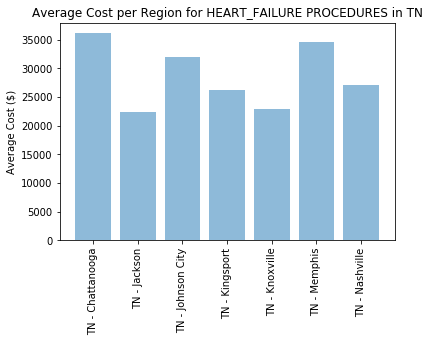

In [124]:
# Create a Bar Chart of the Average Cost per Region for HEART_FAILURE PROCEDURES in TN

drg_HEART_FAILURE_TN_Average_Covered_Charge_List_Values = drg_HEART_FAILURE_TN_Average_Covered_Charge_List
drg_HEART_FAILURE_TN_Region_List_Values = drg_HEART_FAILURE_TN_Region_List
x_axis = np.arange(len(drg_HEART_FAILURE_TN_Region_List))

plt.bar(x_axis, drg_HEART_FAILURE_TN_Average_Covered_Charge_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_HEART_FAILURE_TN_Region_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per Region for HEART_FAILURE PROCEDURES in TN")
plt.ylabel("Average Cost ($)")

In [125]:
# Filter the data so that only a specific procedure in Nashville TN is in the dataframe

DataFrame_drg_HEART_FAILURE_TN_Nashville = DataFrame.loc[(DataFrame["DRG Definition"] == "291 - HEART FAILURE & SHOCK W MCC") & (DataFrame["Provider State"] == "TN") & (DataFrame["Hospital Referral Region Description"] == "TN - Nashville"),:]

DataFrame_drg_HEART_FAILURE_TN_Nashville.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges,Average Covered Charges
62548,291 - HEART FAILURE & SHOCK W MCC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,43,29813.79,9535.00,8299.18,43,29813.79
62549,291 - HEART FAILURE & SHOCK W MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,72,44415.09,9210.45,8159.65,72,44415.09
62550,291 - HEART FAILURE & SHOCK W MCC,440007,UNITED REGIONAL MEDICAL CENTER,1001 MCARTHUR ST,MANCHESTER,TN,37355,TN - Nashville,18,10548.22,8124.72,7560.50,18,10548.22
62552,291 - HEART FAILURE & SHOCK W MCC,440009,CUMBERLAND MEDICAL CENTER,421 S MAIN ST,CROSSVILLE,TN,38555,TN - Nashville,69,21365.40,8283.78,7564.68,69,21365.40
62553,291 - HEART FAILURE & SHOCK W MCC,440010,WAYNE MEDICAL CENTER,103 J V MANGUBAT DR,WAYNESBORO,TN,38485,TN - Nashville,11,10580.72,8719.09,8313.27,11,10580.72


In [126]:

# Display a statistical overview of the HEART_FAILURE PROCEDURES Nashville TN DataFrame for reference

DataFrame_drg_HEART_FAILURE_TN_Nashville.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges,Average Covered Charges
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,440097.484848,37536.424242,52.242424,27049.356970,8861.734242,8029.285455,52.242424,27049.356970
std,70.158803,612.432702,44.266261,10664.900237,1145.020021,1152.779003,44.266261,10664.900237
min,440003.000000,37040.000000,11.000000,10548.220000,7554.700000,6184.890000,11.000000,10548.220000
25%,440039.000000,37110.000000,19.000000,21031.540000,8161.520000,7519.380000,19.000000,21031.540000
50%,440082.000000,37207.000000,38.000000,26266.660000,8692.060000,7756.500000,38.000000,26266.660000
75%,440151.000000,38401.000000,72.000000,32375.050000,8976.160000,8184.730000,72.000000,32375.050000
max,440227.000000,38583.000000,181.000000,54712.130000,12886.450000,12477.720000,181.000000,54712.130000


In [127]:
# Calculate the Number of Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES in Nashville TN
Unique_Provider_count_drg_HEART_FAILURE_TN_Nashville = len(DataFrame_drg_HEART_FAILURE_TN_Nashville["Provider Id"].unique())
Unique_Provider_count_drg_HEART_FAILURE_TN_Nashville

33

In [128]:
# Calculate the Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in Nasvhville TN
Discharge_Count_drg_HEART_FAILURE_TN_Nashville = (DataFrame_drg_HEART_FAILURE_TN_Nashville["Total Discharges"].sum())
Discharge_Count_drg_HEART_FAILURE_TN_Nashville

1724

In [129]:

# Cacluate the average covered charges for DRG HEART_FAILURE PROCEDURES in Nashville TN
Average_Covered_Charges_drg_HEART_FAILURE_TN_Nashville = DataFrame_drg_HEART_FAILURE_TN_Nashville["Average Covered Charges"].mean()
Average_Covered_Charges_drg_HEART_FAILURE_TN_Nashville

27049.356969696975

In [130]:

# Cacluate the min covered charge amount for DRG HEART_FAILURE PROCEDURES in Nashville TN
Min_Covered_Charges_drg_HEART_FAILURE_TN_Nashville = DataFrame_drg_HEART_FAILURE_TN_Nashville["Average Covered Charges"].min()
Min_Covered_Charges_drg_HEART_FAILURE_TN_Nashville

10548.22

In [131]:
# Cacluate the max covered charge amount for DRG HEART_FAILURE PROCEDURES in Nashville TN
Max_Covered_Charges_drg_HEART_FAILURE_TN_Nashville = DataFrame_drg_HEART_FAILURE_TN_Nashville["Average Covered Charges"].max()
Max_Covered_Charges_drg_HEART_FAILURE_TN_Nashville

54712.13

In [132]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in Nashville TN
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN_Nashville = len(DataFrame_drg_HEART_FAILURE_TN_Nashville["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN_Nashville

33

In [133]:
# Create a summary data frame to hold the DRG HEART_FAILURE PROCEDURES in Nashville TN Analysis Results

DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville = pd.DataFrame([
    {"Unique Providers that serviced DRG HEART_FAILURE PROCEDURES in Nashville TN": Unique_Provider_count_drg_HEART_FAILURE_TN_Nashville, 
     "Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in Nashville TN": Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN_Nashville, 
     "Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in Nashville TN": Discharge_Count_drg_HEART_FAILURE_TN_Nashville,
     "Average Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN": Average_Covered_Charges_drg_HEART_FAILURE_TN_Nashville,
     "Max Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN": Max_Covered_Charges_drg_HEART_FAILURE_TN_Nashville,
     "Min Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN": Min_Covered_Charges_drg_HEART_FAILURE_TN_Nashville
    }
])
DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville

,Unique Providers that serviced DRG HEART_FAILURE PROCEDURES in Nashville TN,Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in Nashville TN,Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in Nashville TN,Average Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN,Max Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN,Min Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN
0,33,33,1724,27049.35697,54712.13,10548.22


In [135]:
# Give the displayed data to hold the DRG EXTRACRANIAL PROCEDURES in Nasvhille TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN_Nashville = DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN_Nashville["Average Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville["Average Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN_Nashville["Max Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville["Max Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN_Nashville["Min Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville["Min Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN_Nashville

,Unique Providers that serviced DRG HEART_FAILURE PROCEDURES in Nashville TN,Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in Nashville TN,Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in Nashville TN,Average Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN,Max Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN,Min Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN
0,33,33,1724,"$27,049.36","$54,712.13","$10,548.22"


In [136]:
# Create list to store data of the Providers in Nashville for the specific procedure

drg_HEART_FAILURE_TN_Nashville_ProviderList = []

for Provider in DataFrame_drg_HEART_FAILURE_TN_Nashville["Provider Name"]:
    if Provider not in drg_HEART_FAILURE_TN_Nashville_ProviderList:
        drg_HEART_FAILURE_TN_Nashville_ProviderList.append(Provider)
        
drg_HEART_FAILURE_TN_Nashville_ProviderList

['SUMNER REGIONAL MEDICAL CENTER',
 'SKYLINE MEDICAL CENTER',
 'UNITED REGIONAL MEDICAL CENTER',
 'CUMBERLAND MEDICAL CENTER',
 'WAYNE MEDICAL CENTER',
 'HILLSIDE HOSPITAL',
 'WILLIAMSON MEDICAL CENTER',
 'GATEWAY MEDICAL CENTER',
 'VANDERBILT UNIVERSITY HOSPITAL',
 'PERRY COMMUNITY HOSPITAL',
 'HORIZON MEDICAL CENTER',
 'MIDDLE TENNESSEE MEDICAL CENTER INC',
 'SOUTHERN TENNESSEE MEDICAL CENTER',
 'COOKEVILLE REGIONAL MEDICAL CENTER',
 'NORTHCREST MEDICAL CENTER',
 'MAURY REGIONAL HOSPITAL',
 'ST THOMAS HOSPITAL',
 'JAMESTOWN REGIONAL MEDICAL CENTER',
 'METRO NASHVILLE GENERAL HOSPITAL',
 'BAPTIST HOSPITAL',
 'HERITAGE MEDICAL CENTER',
 'HARTON REGIONAL MEDICAL CENTER',
 'STONES RIVER HOSPITAL AND DEKALB COMMUNITY HOSP',
 'SUMMIT MEDICAL CENTER',
 'RIVER PARK HOSPITAL',
 'CENTENNIAL MEDICAL CENTER',
 'CROCKETT HOSPITAL',
 'LIVINGSTON REGIONAL HOSPITAL',
 'WHITE COUNTY COMMUNITY HOSPITAL',
 'UNIVERSITY MEDICAL CENTER',
 'HENDERSONVILLE MEDICAL CENTER',
 'SOUTHERN HILLS MEDICAL CTR',
 'S

In [137]:
# Create list to store data of the Average Charge in Nashville for the specific procedure

drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List = []

for Cost in DataFrame_drg_HEART_FAILURE_TN_Nashville["Average Covered Charges"]:
    if Cost not in drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List:
        drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List.append(Cost)
        
drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List

[29813.79,
 44415.09,
 10548.22,
 21365.4,
 10580.72,
 16993.06,
 26773.42,
 39683.89,
 45543.94,
 12170.25,
 29669.7,
 25298.01,
 26266.66,
 19874.4,
 20056.0,
 15250.94,
 26984.62,
 21233.45,
 21031.54,
 26345.16,
 23755.76,
 33215.02,
 12463.78,
 35055.95,
 32375.05,
 54712.13,
 23301.42,
 26316.18,
 25596.85,
 33089.69,
 47589.56,
 30336.93,
 24922.2]

In [138]:
# Create a DataFrame of the Average Cost of HEART_FAILURE per Provider in Nashville by merging the lists
Average_Cost_of_HEART_FAILURE_per_Provider_Nashvile_df = pd.DataFrame({
    "DRG": "291 - HEART FAILURE & SHOCK W MCC",
    "Provider": drg_HEART_FAILURE_TN_Nashville_ProviderList,
    "Average Cost": drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List
})
Average_Cost_of_HEART_FAILURE_per_Provider_Nashvile_df

,DRG,Provider,Average Cost
0,291 - HEART FAILURE & SHOCK W MCC,SUMNER REGIONAL MEDICAL CENTER,29813.79
1,291 - HEART FAILURE & SHOCK W MCC,SKYLINE MEDICAL CENTER,44415.09
2,291 - HEART FAILURE & SHOCK W MCC,UNITED REGIONAL MEDICAL CENTER,10548.22
3,291 - HEART FAILURE & SHOCK W MCC,CUMBERLAND MEDICAL CENTER,21365.40
4,291 - HEART FAILURE & SHOCK W MCC,WAYNE MEDICAL CENTER,10580.72
5,291 - HEART FAILURE & SHOCK W MCC,HILLSIDE HOSPITAL,16993.06
6,291 - HEART FAILURE & SHOCK W MCC,WILLIAMSON MEDICAL CENTER,26773.42
7,291 - HEART FAILURE & SHOCK W MCC,GATEWAY MEDICAL CENTER,39683.89
8,291 - HEART FAILURE & SHOCK W MCC,VANDERBILT UNIVERSITY HOSPITAL,45543.94
9,291 - HEART FAILURE & SHOCK W MCC,PERRY COMMUNITY HOSPITAL,12170.25


Text(0, 0.5, 'Average Cost ($)')

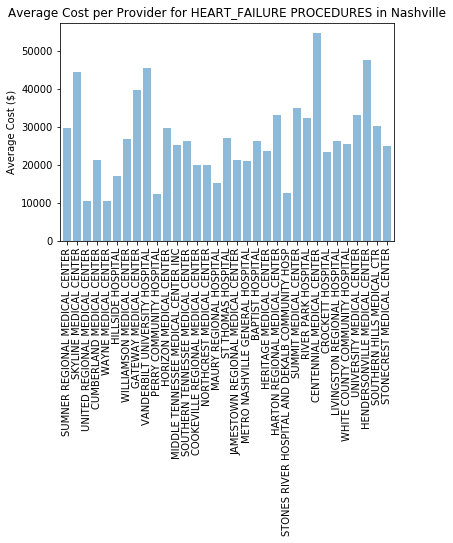

In [139]:
# Create a Bar Chart

AverageCostValue = drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List
ProviderValues = drg_HEART_FAILURE_TN_Nashville_ProviderList
x_axis = np.arange(len(drg_HEART_FAILURE_TN_Nashville_ProviderList))

plt.bar(x_axis, AverageCostValue, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ProviderValues, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per Provider for HEART_FAILURE PROCEDURES in Nashville")
plt.ylabel("Average Cost ($)")